✅ Mac GPU Acceleration Enabled!


2025-07-28 12:02:43.408187: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-07-28 12:02:43.408352: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-07-28 12:02:43.408356: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-07-28 12:02:43.408385: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-28 12:02:43.408396: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


🧠 Training with: VGG19


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,157,507 (76.89 MB)

 Trainable params: 132,611 (518.01 KB)

 Non-trainable params: 20,024,896 (76.39 MB)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


2025-07-28 12:02:44.356016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 460ms/step - accuracy: 0.3925 - loss: 1.6378 - val_accuracy: 0.3947 - val_loss: 1.1504 - learning_rate: 1.0000e-04
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 499ms/step - accuracy: 0.4704 - loss: 1.2766 - val_accuracy: 0.5697 - val_loss: 1.0556 - learning_rate: 1.0000e-04
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 517ms/step - accuracy: 0.5413 - loss: 1.0433 - val_accuracy: 0.5460 - val_loss: 0.9906 - learning_rate: 1.0000e-04
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 525ms/step - accuracy: 0.5731 - loss: 1.0534 - val_accuracy: 0.5282 - val_loss: 0.9460 - learning_rate: 1.0000e-04
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 550ms/step - accuracy: 0.5649 - loss: 1.0528 - val_accuracy: 0.5608 - val_loss: 0.9099 - learning_rate: 1.0000e-04
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 618ms/step - accuracy: 0.5886 - loss: 1.0229 - val_accuracy: 0.6172 - val_loss: 0.8580 - learning_rate: 1.0000e-04
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 839ms/step - accuracy

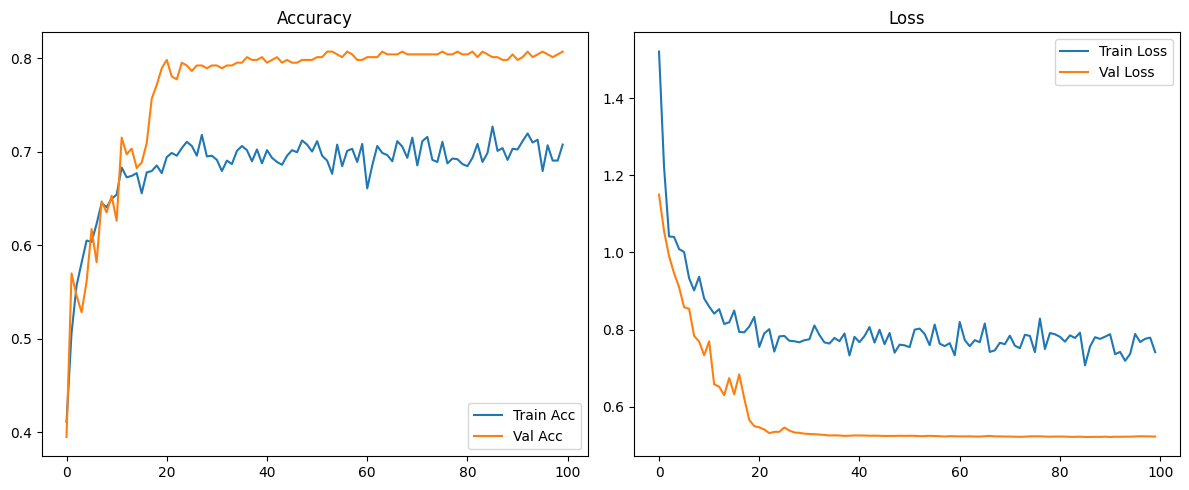

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau

# ✅ Enable Mac GPU Acceleration
try:
    physical_devices = tf.config.experimental.list_physical_devices('GPU')
    if physical_devices:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("✅ Mac GPU Acceleration Enabled!")
    else:
        print("⚠️ No GPU found. Using CPU.")
except Exception as e:
    print("⚠️ GPU config issue:", e)

# CONFIG 🔧
data_dir = "/Users/amitabh/Documents/ML Work/Skin Cancer/v3/dataset"
classes = ["vasc", "df", "akeic"]
img_size = (224, 224)
batch_size = 32
epochs = 100
num_classes = len(classes)

# 🔄 Load and preprocess image data
X, y = [], []
for label, folder in enumerate(classes):
    folder_path = os.path.join(data_dir, folder)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        try:
            img = tf.keras.utils.load_img(img_path, target_size=img_size)
            img_array = tf.keras.utils.img_to_array(img)
            X.append(img_array)
            y.append(label)
        except Exception as e:
            print(f"Skipped {img_path}: {e}")

X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 🔄 Data Augmentation
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
    shear_range=0.1, zoom_range=0.1, horizontal_flip=True
)
val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow(X_train, y_train, batch_size=batch_size)
val_data = val_gen.flow(X_val, y_val, batch_size=batch_size)

# 🧠 Load VGG19 model
base_model = VGG19(weights="imagenet", include_top=False, input_shape=img_size + (3,))
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("🧠 Training with: VGG19")
model.summary()

# 🚀 Train
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)],
    verbose=1
)

# 📊 Evaluate
val_loss, val_acc = model.evaluate(val_data)
print(f"\n✅ Final Val Loss: {val_loss:.4f} | Val Accuracy: {val_acc:.4f}")

# 📈 Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()